This script performs clustering on the scraped data of Java CVE descriptions done [here](https://github.com/Semiu/java-codesecurity/blob/main/data-scraping-curating/Java%20CVEs%20from%20the%20National%20Vulnerabilities%20Database.ipynb).

It aims to identify core categories of Java CVEs as found in the National Vulnerabilities Database.

In [44]:
#Import the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import matplotlib.pyplot as plt

In [45]:
#Function to extract the text (CVE descriptions)
def extract_text_corpus():
    
    cve_text_corpus = []
    
    java_cve_text = pd.read_csv("C:\\Users\\Semiu\\Documents\\java-codesecurity\\JavaVulData\\JavaVulData.csv")
    
    for cve in java_cve_text['vulnerability_description']:
        cve_text_corpus.append(cve)
        
    return cve_text_corpus

In [46]:
#Initialize a vectorizer from the TFIDF
vectorizer = TfidfVectorizer(stop_words='english')

vectorized_corpus = vectorizer.fit_transform(extract_text_corpus())

In [47]:
#The K-Means algorithm for clustering
#Determining the optimal number of clusters using the Elbow Method with Inertia
inertias = []
mapping = {}

no_of_clusters = range(1, 12)
 
for cluster in no_of_clusters:
    
    model = KMeans(n_clusters = cluster, init = 'k-means++', max_iter = 100, n_init = 1)
    
    #Fit the model with the vectorized corpus
    model.fit(vectorized_corpus)
    
    #Append the model inertia values
    inertias.append(model.inertia_)
    
    #Map the cluster with the model inertia values   
    mapping[cluster] = model.inertia_

In [48]:
for key, val in mapping.items():
    print(f'{key} : {val}')

1 : 2051.505689665938
2 : 1955.475884781319
3 : 1932.23482921119
4 : 1836.6801745667904
5 : 1804.0112387254424
6 : 1788.8168973867857
7 : 1775.3372650803792
8 : 1759.2204810947158
9 : 1762.1360049773343
10 : 1731.9475963595926
11 : 1715.5242880781136


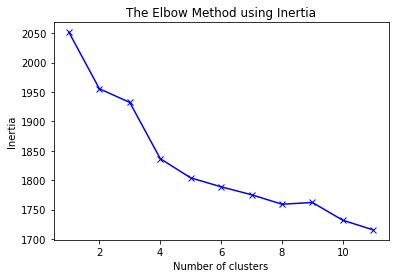

In [49]:
#Plotting the Elbow method using Inertia
plt.plot(no_of_clusters, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
#The plot suggests 4 as the optimal number of clusters in the corpus

In [54]:
#When n_clusters = 4
model = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 100, n_init = 1)
    
#Fit the model with the vectorized corpus
model.fit(vectorized_corpus)

KMeans(max_iter=100, n_init=1)

In [55]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [56]:
for cluster in range(8):
    print("Cluster %d:" %cluster)
    
    for ind in order_centroids[cluster, :20]:
        print('%s' %terms[ind])

Cluster 0:
cve
2014
different
vulnerability
affect
unknown
2013
confidentiality
vectors
unspecified
integrity
se
oracle
12
availability
2015
java
11
remote
related
Cluster 1:
earlier
update
java
se
oracle
affect
environment
related
runtime
unknown
unspecified
vectors
vulnerability
component
jre
confidentiality
integrity
availability
remote
attackers
Cluster 2:
java
arbitrary
remote
execute
attackers
allows
code
crafted
service
server
application
sap
ibm
apache
10
file
does
users
aka
vulnerability
Cluster 3:
se
affect
related
oracle
vectors
unspecified
confidentiality
integrity
unknown
vulnerability
java
embedded
availability
attackers
remote
allows
7u51
7u45
7u60
7u80
Cluster 4:
se
java
embedded
sandboxed
cvss
jrockit
vulnerability
web
exploited
data
apis
start
applications
applets
access
component
attacks
specified
service
successful
Cluster 5:
jre
jdk
earlier
update
sdk
sun
environment
runtime
java
aka
untrusted
attackers
files
unspecified
2_18
development
overflow
privileges
allows


In [57]:
#Get the function's return value into a variable
list_of_cve = extract_text_corpus()

In [58]:
#Function to concantenate the list of CVE to a string
def concatenate_cve (list_of_cve):
    concatenated_cve = ""
    for cve in list_of_cve:
        concatenated_cve += cve
    return concatenated_cve

In [59]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = (concatenate_cve (list_of_cve))
doc = nlp(text)

# Analyze syntax
vulnerability_phrases = [chunk.text for chunk in doc.noun_chunks]

In [60]:
#Convert the vulnerabilities phrases/entities to data frame
vul_phrases_df = pd.DataFrame(vulnerability_phrases,columns=["vulnerability_phrases"])

C:\Users\Semiu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


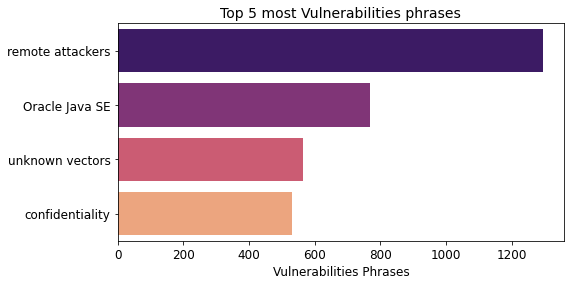

In [62]:
# Top 5 vulnerabilities phrases
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(vul_phrases_df['vulnerability_phrases'].value_counts()[1:5].values, vul_phrases_df['vulnerability_phrases'].value_counts()[1:5].index, palette=('magma'));
# customization
plt.xlabel('Vulnerabilities Phrases',fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top 5 most Vulnerabilities phrases',size=14)
plt.show();

The leading vulnerabilities suggested, based on the vulnerabilities phrases and the review of the Java CVE content are:
1. Remote code execution/attack
2. Cross site scripting, is shown as an associate of remote attack and predominantly found in Oracle Java SE 7 runtime
3. Buffer overflow, from lack of input sanitization.